# Test du Fader Network

In [1]:
import os
import sys
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt
import PIL
import numpy as np
import pandas as pd

# Ajouter le chemin racine au PYTHONPATH pour pouvoir importer les modules personnalisés
sys.path.append(os.path.abspath('.'))

from Plot.affichage import plot_attribut, interact_user
from Data.preprocess import load_images
from Models.fader_network import FaderNetwork
from Models.discriminator import Discriminator

## Configuration des paramètres

In [2]:
# Configuration des paramètres
selected_attrs = ['Smiling', 'Male', 'Eyeglasses', 'Young', 'Mouth_Slightly_Open']
num_attributes = len(selected_attrs)
end = 202599
start = 200000
index = (start, end)
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Utilisation du device : {device}")
auto_encoder = FaderNetwork(attribute_dim=num_attributes, attributes=selected_attrs).to(device)
(train_loader, valid_loader, test_loader) = load_images(index = index, selected_attrs = selected_attrs, batch_size=32)

Utilisation du device : cuda


Processing Attribute: 100%|██████████| 2597/2597 [00:00<00:00, 44869.49it/s]


## Chargement du modèle enregistré

In [3]:
auto_encoder.load_state_dict(torch.load('./Models/trained_model/TrainBD_100_full//auto_encoder_epoch_100.pth'))
#auto_encoder.load_state_dict(torch.load('./Models/trained_model/TrainBD_50_100_2/auto_encoder_epoch_100.pth'))
#auto_encoder.load_state_dict(torch.load('./Models/trained_model/TrainBD_50_full_4/auto_encoder_epoch_50.pth'))

auto_encoder.eval()

print("Modèles chargés et prêts pour le test.")

Modèles chargés et prêts pour le test.


## Affichage de la reconstruction de l'image suivi des attributs un par un

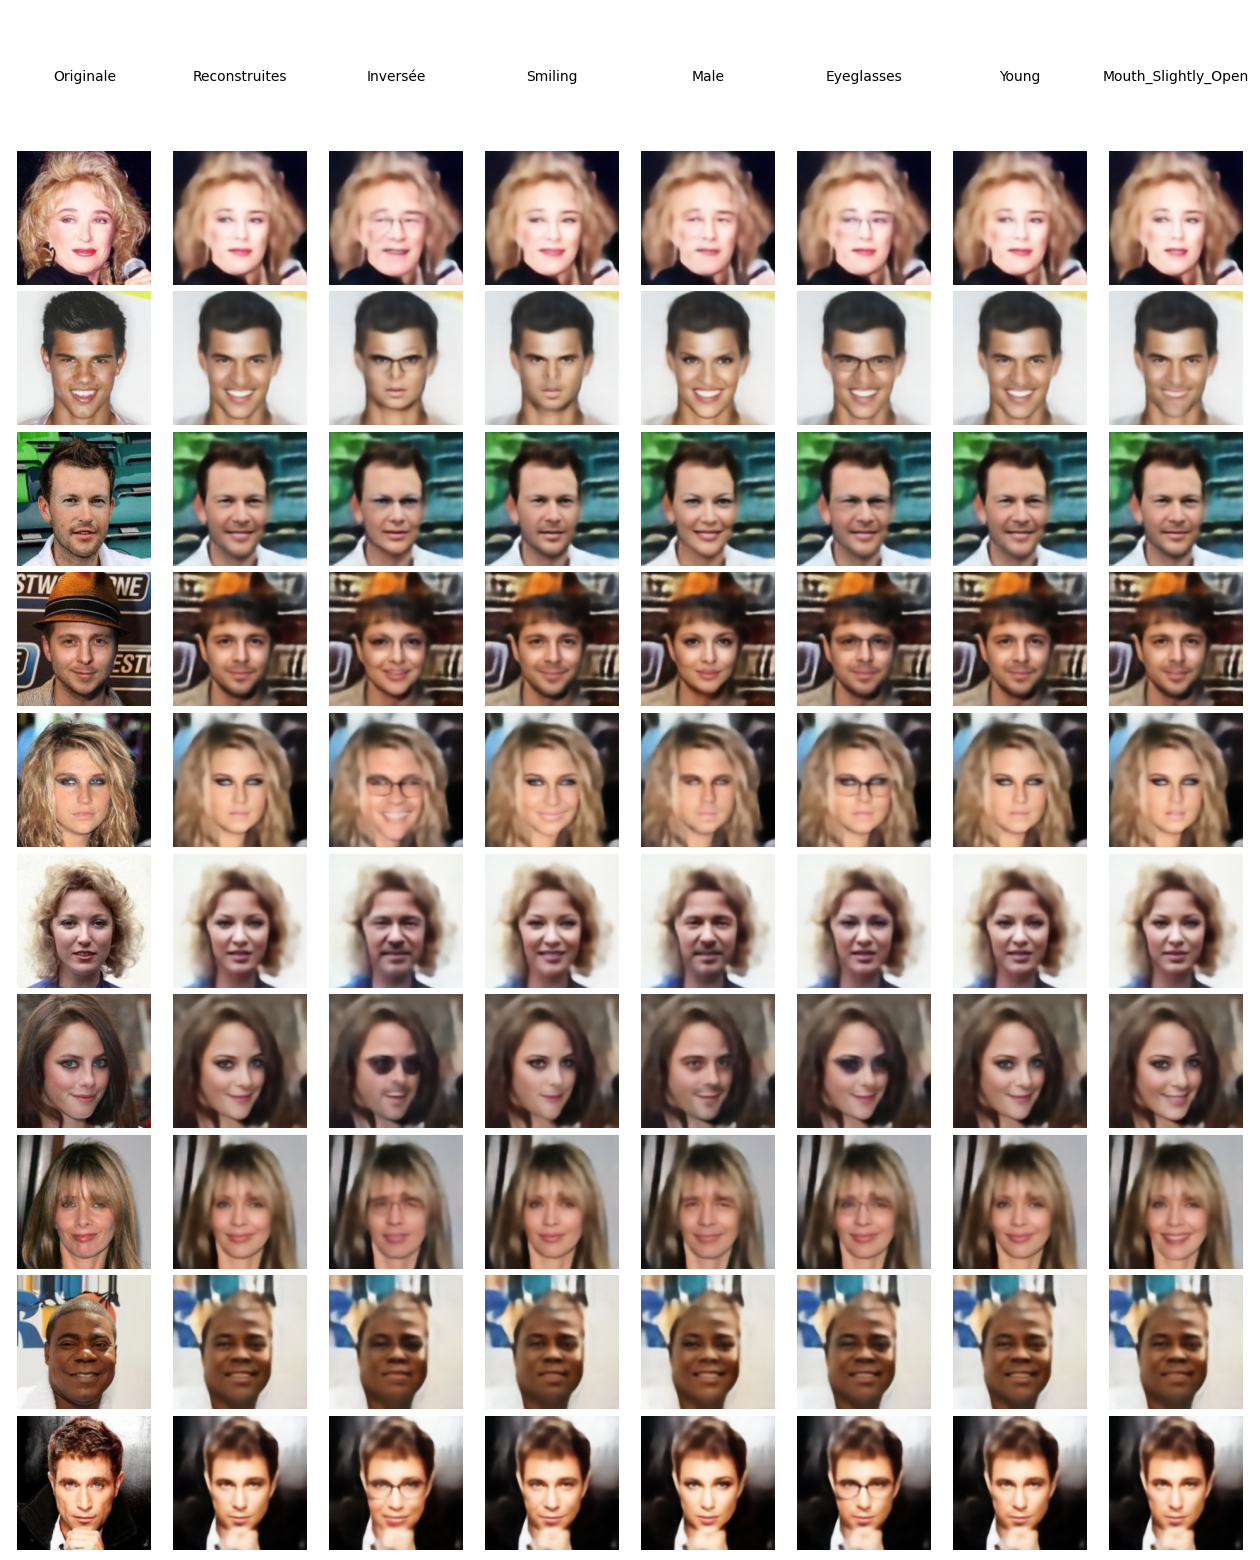

In [4]:
loader = valid_loader  #test_loader Veuillez-choisir la base sur laquelle vous souhaitez tester
plot_attribut(auto_encoder, device, selected_attrs, loader, num_examples=10)

## Intéraction utilisateur

Entrez un index d'image (entre 0 et 31) :  4


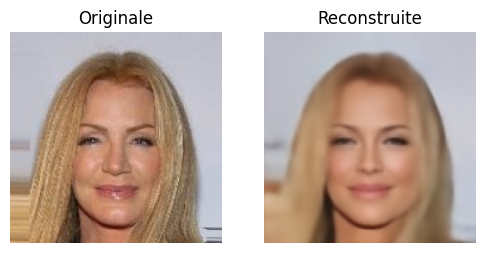


Attributs pour cette image :
 - Smiling : présent
 - Male : absent
 - Eyeglasses : absent
 - Young : présent
 - Mouth_Slightly_Open : absent

Options disponibles :
 - Entrez les noms des attributs à inverser (ex : 'Smiling Eyeglasses')
 - Entrez 'all' pour inverser tous les attributs
 - Appuyez sur Entrée sans rien saisir pour quitter


Quels attributs souhaitez-vous inverser ?
>  Smiling Mouth_Slightly_Open


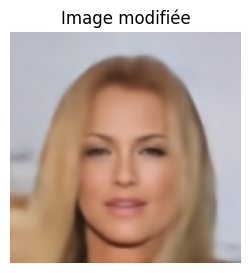

In [6]:
loader =  test_loader #valid_loader Veuillez-choisir la base sur laquelle vous souhaitez tester
interact_user(auto_encoder, device, selected_attrs, loader)